In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Diamonds.xlsx')

In [ ]:
df.columns

Index(['diamond_id', 'shape', 'size', 'color', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'clarity', 'cut', 'symmetry', 'polish',
       'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'girdle_min', 'girdle_max', 'culet_size',
       'culet_condition', 'fluor_color', 'fluor_intensity', 'lab',
       'total_sales_price', 'eye_clean', 'date'],
      dtype='object')

ANN

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
df.drop(['diamond_id','date'],axis =1,inplace=True)

In [ ]:
X = df.drop('total_sales_price',axis =1)
Y = df['total_sales_price']

In [ ]:
indices = []
for i in X.columns:
      if X[i].dtype != 'float64' and X[i].dtype != 'int64' and X[i].dtype != "datetime64[ns]":
         indices.append(X.columns.get_loc(i))
indices

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 18, 19, 20, 21, 22, 23]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from keras.models import load_model
ct = ColumnTransformer([('ohe',OneHotEncoder(),[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 18, 19, 20, 21, 22, 23]
)],remainder= "passthrough")

In [ ]:
X = (ct.fit_transform(X)).toarray()

In [ ]:
X

array([[ 0.  ,  1.  ,  0.  , ...,  8.14, 11.33, 14.25],
       [ 0.  ,  1.  ,  0.  , ...,  3.88, 13.56, 10.16],
       [ 0.  ,  0.  ,  0.  , ...,  5.11, 12.12, 11.98],
       ...,
       [ 1.  ,  0.  ,  0.  , ..., 11.07,  9.68,  9.62],
       [ 0.  ,  0.  ,  0.  , ..., 16.14, 14.56,  8.89],
       [ 0.  ,  0.  ,  1.  , ...,  7.99,  3.83,  9.14]])

In [ ]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {Y.shape}")

Shape of X: (219704, 142)
Shape of y: (219704,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess your dataset here (including encoding categorical variables).

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#  Standardize input features.
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)
# Build the ANN model.
model = keras.Sequential([
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=1)  # Output layer for regression
])


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

[[3.49156647 0.         0.         ... 2.60360612 3.80723007 1.15549707]
 [3.49156647 0.         0.         ... 0.78498237 2.79699958 2.75466601]
 [0.         0.         0.         ... 1.25548422 2.490279   2.75954152]
 ...
 [0.         0.         0.         ... 0.97025771 3.11345732 1.44559021]
 [0.         0.         0.         ... 3.15455647 2.69962797 0.89465701]
 [0.         0.         0.         ... 1.22866805 1.20253942 3.34460333]]


In [ ]:
print(X_test_scaled.shape)

(43941, 142)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
4944/4944 [==============================] - 21s 4ms/step - loss: 236936282112.0000 - mae: 404978.1875 - val_loss: 182773235712.0000 - val_mae: 366974.8438
Epoch 2/100
4944/4944 [==============================] - 19s 4ms/step - loss: 181728247808.0000 - mae: 366710.3125 - val_loss: 179885604864.0000 - val_mae: 364890.8750
Epoch 3/100
4944/4944 [==============================] - 16s 3ms/step - loss: 179125059584.0000 - mae: 364958.4688 - val_loss: 177363091456.0000 - val_mae: 362997.9688
Epoch 4/100
4944/4944 [==============================] - 16s 3ms/step - loss: 177009033216.0000 - mae: 363483.0000 - val_loss: 175580413952.0000 - val_mae: 361701.8750
Epoch 5/100
4944/4944 [==============================] - 18s 4ms/step - loss: 175688204288.0000 - mae: 362614.8438 - val_loss: 174316273664.0000 - val_mae: 360743.9062
Epoch 6/100
4944/4944 [==============================] - 17s 3ms/step - loss: 175101247488.0000 - mae: 362219.6250 - val_loss: 173976354816.0000 - val_mae: 3605

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               18304     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 26625 (104.00 KB)
Trainable params: 26625 (104.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
arr = scaler.fit_transform(ct.transform([[ 'Cushion','5.57','J','Blue','Orange','Pinkish','Fancy Dark','VVS1','Poor','Very Good','Fair','8.4','1.4000000000000001','8.14','11.33','14.25','M','VTK','SL','Blue','Blue','Faint','GIA','E1']]).toarray())
arr

array([[ 0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
      

In [ ]:
from keras.models import load_model

# Save the model
model.save('model1.h5')

In [ ]:
import pickle
pickle.dump(scaler,open('scale1.pkl','wb') )
import joblib
joblib.dump(ct,'column')

['column']

In [ ]:
predictions = model.predict(arr)

1/1 [==============================] - 0s 89ms/step


In [ ]:
predictions

array([[728314.]], dtype=float32)

In [ ]:

# Evaluate the model.
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Absolute Error on Test Data: {mae}")

# Make predictions
predictions = model.predict(X_test_scaled)

1374/1374 [==============================] - 2s 1ms/step - loss: 1667870228480.0000 - mae: 1220875.1250
Mean Absolute Error on Test Data: 1220875.125
1374/1374 [==============================] - 3s 2ms/step


In [ ]:
X_test

array([[ 1.  ,  0.  ,  0.  , ..., 10.68, 15.64,  4.74],
       [ 1.  ,  0.  ,  0.  , ...,  3.22, 11.49, 11.3 ],
       [ 0.  ,  0.  ,  0.  , ...,  5.15, 10.23, 11.32],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  3.98, 12.79,  5.93],
       [ 0.  ,  0.  ,  0.  , ..., 12.94, 11.09,  3.67],
       [ 0.  ,  0.  ,  0.  , ...,  5.04,  4.94, 13.72]])

In [ ]:
predictions.shape

(43941, 1)

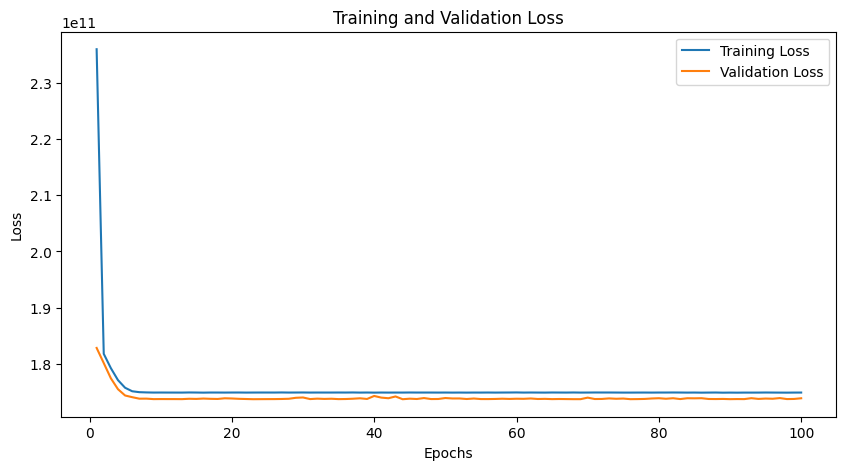

In [ ]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

Mean Absolute Error: 363649.3299879384
Mean Squared Error: 176199234450.0504
Root Mean Squared Error: 419760.9253492402
R-squared (R2) Score: -0.0011053614054501448


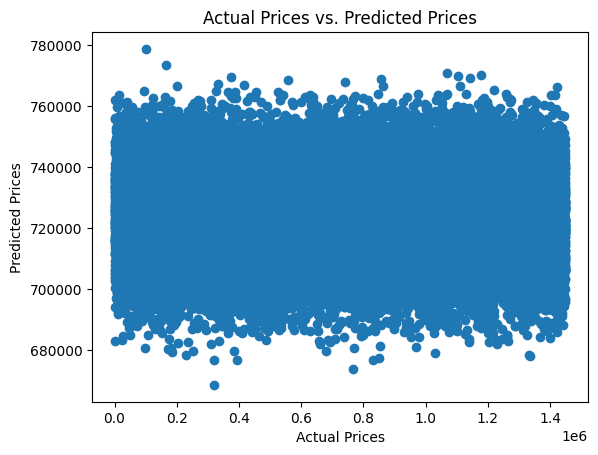

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")

# Optional: Plot the predicted vs. actual prices
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

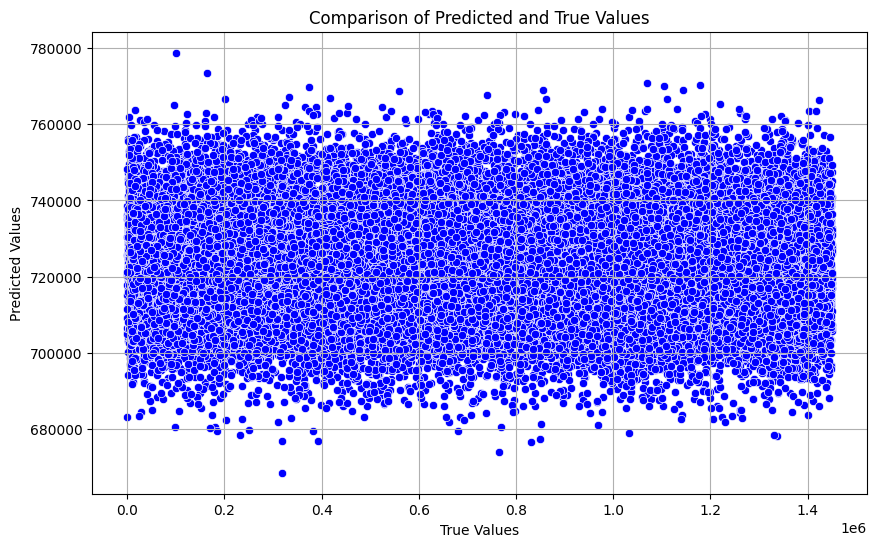

In [ ]:
res = pd.DataFrame({'True Values': y_test, 'Predicted Values': Y_pred})

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=res, x='True Values', y='Predicted Values', color='blue')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted and True Values')
plt.grid(True)
plt.show()

In [ ]:
df.columns

Index(['shape', 'size', 'color', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'clarity', 'cut', 'symmetry', 'polish',
       'depth_percent', 'table_percent', 'meas_length', 'meas_width',
       'meas_depth', 'girdle_min', 'girdle_max', 'culet_size',
       'culet_condition', 'fluor_color', 'fluor_intensity', 'lab',
       'total_sales_price', 'eye_clean'],
      dtype='object')

In [ ]:
df.describe()

,size,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219704.000000,219704.000000,219704.000000,219704.000000,219704.000000,219704.000000,2.197040e+05
mean,9.726851,4.948760,4.699964,9.949406,9.956178,9.950351,7.247139e+05
std,5.567481,2.890016,2.742027,4.103321,4.109711,4.105096,4.183427e+05
min,0.090000,0.000000,0.000000,2.850000,2.850000,2.850000,2.040000e+02
25%,4.900000,2.400000,2.300000,6.400000,6.400000,6.390000,3.622228e+05
50%,9.720000,4.900000,4.700000,9.950000,9.960000,9.960000,7.245575e+05
75%,14.560000,7.500000,7.100000,13.500000,13.520000,13.500000,1.086120e+06
max,19.350000,9.900000,9.400000,17.060000,17.060000,17.060000,1.449879e+06


In [2]:
import pandas as pd
from keras.models import load_model
import pickle
import joblib

# Load the saved ANN model, scaler, and column transformer
model = load_model('/content/drive/MyDrive/diamond/model1.h5')
scaler = pickle.load(open('/content/drive/MyDrive/diamond/scale1.pkl', 'rb'))
ct = joblib.load('/content/drive/MyDrive/diamond/column')

# Function to preprocess new data
def preprocess_input(data):
    transformed_data = ct.transform(data)
    scaled_data = scaler.transform(transformed_data.toarray())
    return scaled_data

# Sample test input data (replace with actual test data)
test_data = pd.DataFrame([['Cushion', '5.57', 'J', 'Blue', 'Orange', 'Pinkish', 'Fancy Dark', 'VVS1', 'Poor', 'Very Good', 'Fair', '8.4', '1.4', '8.14', '11.33', '14.25', 'M', 'VTK', 'SL', 'Blue', 'Blue', 'Faint', 'GIA', 'E1']],
                         columns=['shape', 'size', 'color', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity', 'clarity', 'cut', 'symmetry', 'polish', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'culet_size', 'culet_condition', 'fluor_color', 'fluor_intensity', 'lab', 'eye_clean'])

# Preprocess the input data
preprocessed_data = preprocess_input(test_data)

# Make predictions using the ANN model
predictions_ann = model.predict(preprocessed_data)
print(f"Predicted price of the diamond: {predictions_ann[0][0]}")


1/1 [==============================] - 1s 690ms/step
Predicted price of the diamond: 708884.9375
